### In this assignment, we use photos from Large-scale CelebFaces Attributes (CelebA) Dataset to train convets that can classify photos into male celebrities and female celebrities accurately.

###To make this problem more challenging, we only use 2,000 photos for training, 1,000 photos for validation, and 1,000 photos for testing.

###For the first part of the assignment, following the example of chapter 8.2. Here we train our model using only the 2,000 training photos. Note we need to use data augmentation and dropout to fight overfiting. This part is worth 40 points.

###For the second part, we use a pretrained convet (VGG16) to help with our task. Do the fast feature extraction without augmentation following chapter 8.3.1. And do the fine-tuning following chapter 8.3.2. This part is worth 60 points.

###Important information before you start: all the photos are of the size (218, 178), where height = 218, and width = 178.

###Finally, we should be able to achieve 94% of accuracy following the code provided by this module. Not much changes are needed.

Before we start, we need to copy hw6.zip to Google drive. And then we need to mount the Google drive using the following statements.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We then unzip hw6.zip.

In [2]:
!unzip /content/drive/My\ Drive/hw6.zip

Archive:  /content/drive/My Drive/hw6.zip
   creating: hw6/
   creating: hw6/test/
  inflating: hw6/test/.DS_Store      
   creating: hw6/test/male/
  inflating: hw6/test/male/003676.jpg  
  inflating: hw6/test/male/003258.jpg  
  inflating: hw6/test/male/003879.jpg  
  inflating: hw6/test/male/003025.jpg  
  inflating: hw6/test/male/003497.jpg  
  inflating: hw6/test/male/003108.jpg  
  inflating: hw6/test/male/003044.jpg  
  inflating: hw6/test/male/003206.jpg  
  inflating: hw6/test/male/003638.jpg  
  inflating: hw6/test/male/003311.jpg  
  inflating: hw6/test/male/003600.jpg  
  inflating: hw6/test/male/003032.jpg  
  inflating: hw6/test/male/003360.jpg  
  inflating: hw6/test/male/003825.jpg  
  inflating: hw6/test/male/003159.jpg  
  inflating: hw6/test/male/003805.jpg  
  inflating: hw6/test/male/003364.jpg  
  inflating: hw6/test/male/003153.jpg  
  inflating: hw6/test/male/003274.jpg  
  inflating: hw6/test/male/003077.jpg  
  inflating: hw6/test/male/003773.jpg  
  inflating

In [3]:
import keras
keras.__version__

'2.15.0'

In [4]:
import os, shutil

In [5]:
base_dir = '/content//hw6'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Directory with our training male pictures
train_male_dir = os.path.join(train_dir, 'male')

# Directory with our training female pictures
train_female_dir = os.path.join(train_dir, 'female')

# Directory with our validation male pictures
validation_male_dir = os.path.join(validation_dir, 'male')

# Directory with our validation female pictures
validation_female_dir = os.path.join(validation_dir, 'female')

# Directory with our validation male pictures
test_male_dir = os.path.join(test_dir, 'male')

# Directory with our validation female pictures
test_female_dir = os.path.join(test_dir, 'female')

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [6]:
print('total training male images:', len(os.listdir(train_male_dir)))

total training male images: 825


In [7]:
print('total training female images:', len(os.listdir(train_female_dir)))

total training female images: 1175


In [8]:
print('total validation male images:', len(os.listdir(validation_male_dir)))

total validation male images: 413


In [9]:
print('total validation female images:', len(os.listdir(validation_female_dir)))

total validation female images: 587


In [10]:
print('total test male images:', len(os.listdir(test_male_dir)))

total test male images: 412


In [11]:
print('total test female images:', len(os.listdir(test_female_dir)))

total test female images: 588


###Finish the rest by modifying the code provided in this module.

Note not much changes expected.

Just make sure the model fine_turning.h5 is trained using 50 epochs.

Below is the test accuracy obtained from one of the runs.

In total, it takes rougly 10 minutes to finish when using GPU.

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(218, 178, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 218, 178, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 216, 176, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 108, 88, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 86, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 43, 64)        0         
 g2D)                                                        

In [14]:
model.compile(loss="binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

Data Preprocessing

In [15]:
import os, shutil, pathlib
from tensorflow.keras.utils import image_dataset_from_directory


train_dataset = image_dataset_from_directory(
    train_dir,
    image_size=(218, 178),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    validation_dir,
    image_size=(218, 178),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    test_dir,
    image_size=(218, 178),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [16]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [17]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [18]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [19]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


Displaying the shapes of the data and labels yielded by the Dataset

In [20]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 218, 178, 3)
labels batch shape: (32,)


Fitting the model using a Dataset

configuring the model for training

In [21]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 13s 108ms/step - loss: 0.6649 - accuracy: 0.6105 - val_loss: 0.6663 - val_accuracy: 0.6060
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


63/63 [==============================] - 3s 51ms/step - loss: 0.5895 - accuracy: 0.6995 - val_loss: 0.5314 - val_accuracy: 0.7250
Epoch 3/30
63/63 [==============================] - 3s 52ms/step - loss: 0.5194 - accuracy: 0.7495 - val_loss: 0.4837 - val_accuracy: 0.7650
Epoch 4/30
63/63 [==============================] - 4s 53ms/step - loss: 0.4366 - accuracy: 0.8035 - val_loss: 0.4650 - val_accuracy: 0.7350
Epoch 5/30
63/63 [==============================] - 3s 51ms/step - loss: 0.3412 - accuracy: 0.8475 - val_loss: 0.2489 - val_accuracy: 0.9040
Epoch 6/30
63/63 [==============================] - 4s 65ms/step - loss: 0.2504 - accuracy: 0.8940 - val_loss: 0.2368 - val_accuracy: 0.8950
Epoch 7/30
63/63 [==============================] - 4s 63ms/step - loss: 0.2076 - accuracy: 0.9185 - val_loss: 0.2268 - val_accuracy: 0.9070
Epoch 8/30
63/63 [==============================] - 3s 50ms/step - loss: 0.1538 - accuracy: 0.9390 - val_loss: 0.3514 - val_accuracy: 0.8580
Epoch 9/30
63/63 [======

Displaying curves of loss and accuracy during training

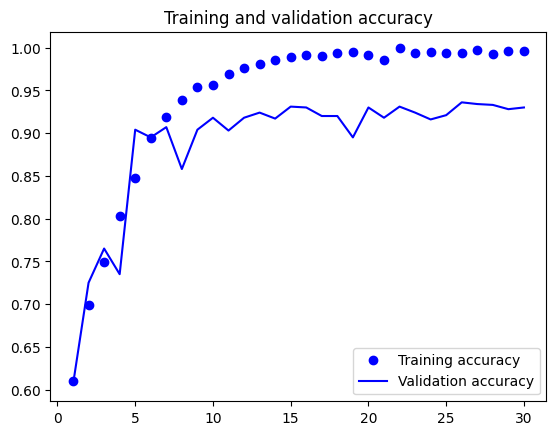

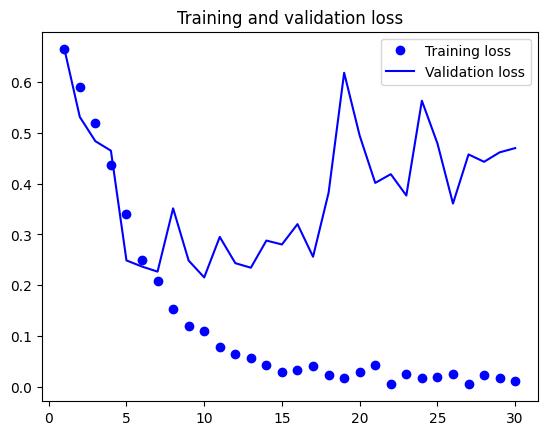

In [22]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Evaluating the model on the test set

In [23]:
test_model = keras.models.load_model("convnet_from_scratch.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 18ms/step - loss: 0.1877 - accuracy: 0.9280
Test accuracy: 0.928


Part 1: Using Data Augumentation

Define a data augmentation stage to add to an image model

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Displaying some randomly augmented training images

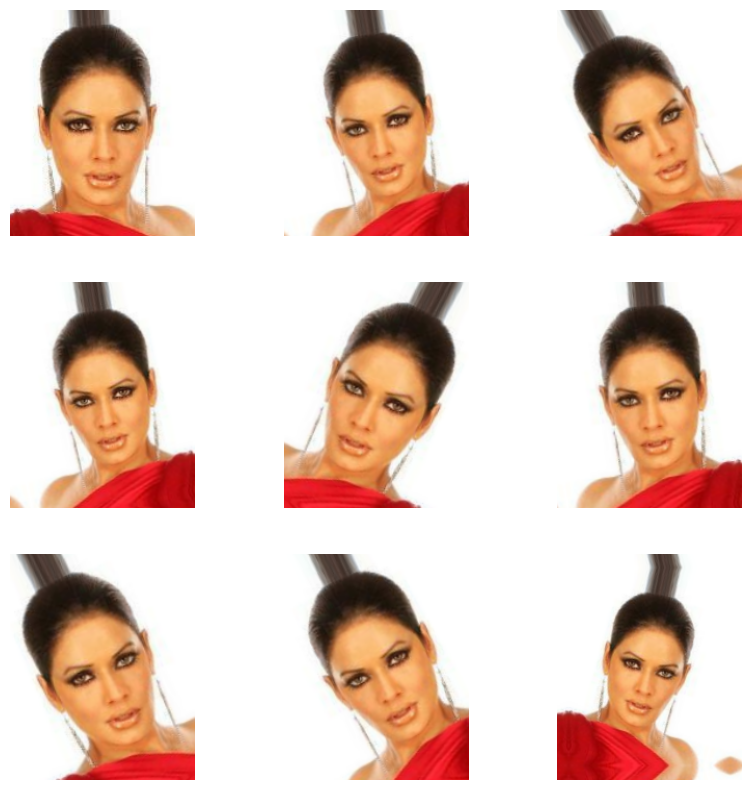

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convnet that includes image augmentation and dropout

In [26]:
inputs = keras.Input(shape=(218, 178, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 218, 178, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 218, 178, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 216, 176, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 108, 88, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 86, 64)       18496     
                                                           

In [28]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 70ms/step - loss: 0.6942 - accuracy: 0.5730 - val_loss: 0.6808 - val_accuracy: 0.5870
Epoch 2/100
63/63 [==============================] - 3s 54ms/step - loss: 0.6830 - accuracy: 0.5930 - val_loss: 0.6493 - val_accuracy: 0.6820
Epoch 3/100
63/63 [==============================] - 4s 54ms/step - loss: 0.6212 - accuracy: 0.6640 - val_loss: 0.5989 - val_accuracy: 0.6450
Epoch 4/100
63/63 [==============================] - 4s 61ms/step - loss: 0.5810 - accuracy: 0.7025 - val_loss: 0.5148 - val_accuracy: 0.7470
Epoch 5/100
63/63 [==============================] - 3s 54ms/step - loss: 0.5295 - accuracy: 0.7365 - val_loss: 0.5255 - val_accuracy: 0.7480
Epoch 6/100
63/63 [==============================] - 3s 53ms/step - loss: 0.4875 - accuracy: 0.7655 - val_loss: 0.4409 - val_accuracy: 0.7880
Epoch 7/100
63/63 [==============================] - 4s 58ms/step - loss: 0.4588 - accuracy: 0.7925 - val_loss: 0.3399 - val_accuracy: 0.8450
Epoch 

Evaluating the model on the test set

In [29]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 17ms/step - loss: 0.2040 - accuracy: 0.9180
Test accuracy: 0.918


# PART 2: Using a pretrained convet (VGG16) to help with our task.

We do fast feature extraction without augmentation.

### Feature extraction with a pretrained model

Instantiating the VGG16 convolutional base

In [30]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(218, 178, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [31]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 218, 178, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 218, 178, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 218, 178, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 109, 89, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 109, 89, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 109, 89, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 54, 44, 128)       0     

**Fast feature extraction without data augmentation**

Extracting the VGG16 features and corresponding labels

In [32]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 20ms/step




Defining and training the densely connected classifier

In [33]:
inputs = keras.Input(shape=(6, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [34]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.h5",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 11.0284 - accuracy: 0.8545 - val_loss: 6.3595 - val_accuracy: 0.9080
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 3.7867 - accuracy: 0.9400 - val_loss: 8.0444 - val_accuracy: 0.8770
Epoch 3/20
63/63 [==============================] - 0s 7ms/step - loss: 1.6502 - accuracy: 0.9640 - val_loss: 6.1438 - val_accuracy: 0.9110
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.4441 - accuracy: 0.9650 - val_loss: 7.8904 - val_accuracy: 0.9070
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8943 - accuracy: 0.9765 - val_loss: 6.8681 - val_accuracy: 0.9070
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6147 - accuracy: 0.9840 - val_loss: 9.5995 - val_accuracy: 0.9010
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.5880 - accuracy: 0.9830 - val_loss: 6.9291 - val_accuracy: 0.9080
Epoch 8/20
63/63 [

Plotting the results

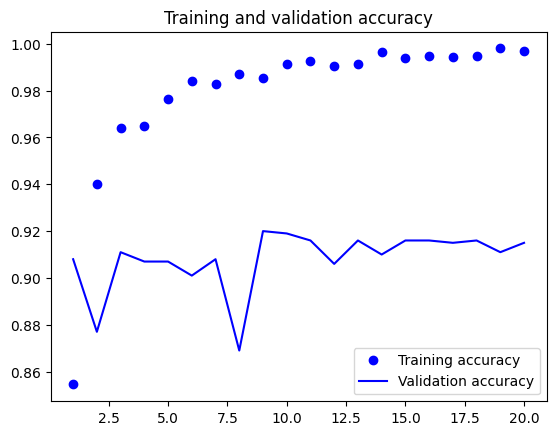

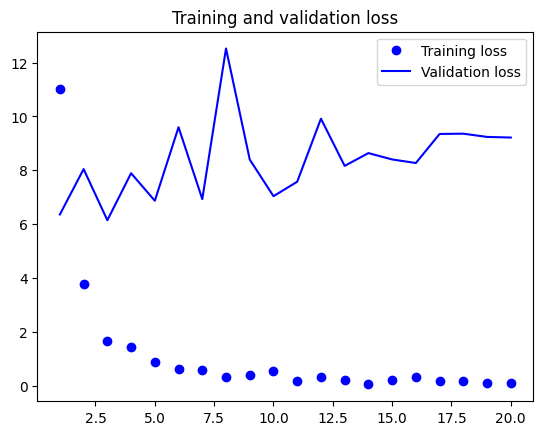

In [35]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Adding a classifier to the convolutional base

In [36]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [37]:
inputs = keras.Input(shape=(218, 178, 3))
x = keras.Sequential()(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [38]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_without_data_augmentation.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 13s 176ms/step - loss: 10.5844 - accuracy: 0.8590 - val_loss: 6.2440 - val_accuracy: 0.8990
Epoch 2/50
63/63 [==============================] - 11s 176ms/step - loss: 3.4674 - accuracy: 0.9410 - val_loss: 7.2105 - val_accuracy: 0.9020
Epoch 3/50
63/63 [==============================] - 11s 175ms/step - loss: 1.9547 - accuracy: 0.9545 - val_loss: 6.2905 - val_accuracy: 0.9070
Epoch 4/50
63/63 [==============================] - 11s 171ms/step - loss: 0.9294 - accuracy: 0.9745 - val_loss: 7.4801 - val_accuracy: 0.9080
Epoch 5/50
63/63 [==============================] - 11s 175ms/step - loss: 1.1668 - accuracy: 0.9750 - val_loss: 6.9562 - val_accuracy: 0.9120
Epoch 6/50
63/63 [==============================] - 11s 178ms/step - loss: 0.8987 - accuracy: 0.9800 - val_loss: 9.0164 - val_accuracy: 0.8990
Epoch 7/50
63/63 [==============================] - 11s 172ms/step - loss: 0.6966 - accuracy: 0.9845 - val_loss: 8.4688 - val_accuracy: 0.908

In [39]:
test_model = keras.models.load_model(
    "feature_extraction_without_data_augmentation.h5")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 111ms/step - loss: 6.0525 - accuracy: 0.9150
Test accuracy: 0.915


# Fine-tuning a pretrained model

In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Freezing all layers until the fourth from the last

In [50]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [51]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

Finetuning the Model

In [52]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 195ms/step - loss: 3.3324e-13 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 2/50
63/63 [==============================] - 12s 196ms/step - loss: 1.0840e-16 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 3/50
63/63 [==============================] - 14s 217ms/step - loss: 2.0931e-16 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 4/50
63/63 [==============================] - 13s 212ms/step - loss: 2.6810e-28 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 5/50
63/63 [==============================] - 12s 186ms/step - loss: 1.5831e-11 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 6/50
63/63 [==============================] - 12s 191ms/step - loss: 6.8958e-15 - accuracy: 1.0000 - val_loss: 10.5407 - val_accuracy: 0.9220
Epoch 7/50
63/63 [==============================] - 12s 190ms/step - loss: 2.0378e-25 - accuracy: 1.0000 - val_l

In [58]:
model = keras.models.load_model("fine_tuning.h5")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 108ms/step - loss: 11.3126 - accuracy: 0.9480
Test accuracy: 0.948
